<a href="https://colab.research.google.com/github/SomduttaPoddar/Somdutta.Emotion_Detection_Project/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies
!pip install neattext seaborn scikit-learn joblib nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.8 MB/s eta 0:00:00


In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Load dataset
df = pd.read_csv('/content/emotion_dataset_filled_500.csv')
df = df[['content', 'sentiment']]

# Text Preprocessing
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = nfx.remove_userhandles(text)
    text = nfx.remove_punctuations(text)
    text = nfx.remove_stopwords(text)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df['clean_text'] = df['content'].apply(clean_text)

In [4]:
# Split dataset
X = df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline with Logistic Regression
model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [5]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00        18
     disgust       1.00      1.00      1.00        15
        fear       1.00      1.00      1.00        17
   happiness       1.00      1.00      1.00        19
     sadness       1.00      1.00      1.00        15
    surprise       1.00      1.00      1.00        16

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



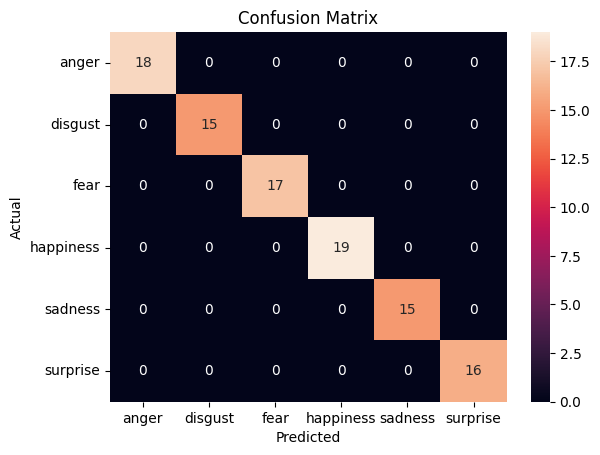

In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# Save model
joblib.dump(model, "emotion_text_model_highacc.pkl")

['emotion_text_model_highacc.pkl']

In [8]:
# Load model
model = joblib.load("emotion_text_model_highacc.pkl")

# Load and preprocess new file
new_df = pd.read_csv('/content/emotion_dataset_filled_500.csv')  # or your new CSV
new_df['clean_text'] = new_df['content'].apply(clean_text)

# Predict
predictions = model.predict(new_df['clean_text'])
new_df['predicted_sentiment'] = predictions
print(new_df[['content', 'predicted_sentiment']].head())

                                      content predicted_sentiment
0                        i lost my job today.             sadness
1  i just got accepted into my dream college!           happiness
2         Why does this always happen to me?!               anger
3                      It's been a rough day.             sadness
4             Did not see that coming at all.            surprise
